<h3 left style='color:#ffaa00'></h3><a class='anchor' id='o'></a>
<h1><center style='color:#ffaa00'>Table of Contents</h1>

* [Loading Packages](#a)
* [Loading Datasets](#b)
* [Exploratory Data Analysis](#c)
* [Data Visualization](#e)
 * **Daily Data**
 * [Daily Confirmed](#f)
 * [Daily Recovered](#g)
 * [Daily Deceased](#h)
 * [Daily Confirmed vs Daily Recovered](#i)
   * **Overall Data**
   * [Total Confirmed](#j)
   * [Total Recovered](#k)
   * [Total Deceased](#l)
   * [Total Deceased vs Total Recovered vs Total Deceased](#m)
   * [Overall Timeline](#p)
* [Stats](#n)


<h2><center style='color:#ffaa00'>Loading Packages<a class='anchor' id='a'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from datetime import datetime
today = datetime.now()

import os
if not os.path.exists('IND_'+ today.strftime('%d-%m-%Y')):
    os.mkdir('E:/Data Science Datasets/Covid_19_Master/Local/' +'IND_'+ today.strftime('%d-%m-%Y'))

%matplotlib inline

<h1><center style='color:#ffaa00'>Loading Datasets<a class='anchor' id='b'></a>

In [2]:
india = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

<h2><center style='color:#ffaa00'>Exploratory Data Analysis<a class='anchor' id='c'></a>

In [3]:
india.drop(columns=['Date'], inplace = True)
india.rename(columns = {'Date_YMD':'Date'}, inplace = True)

In [4]:
one_month = india.tail(45)

<h1><center style='color:#ffaa00'>Data Visualization<a class='anchor' id='e'></a>

<b><i><H2 align="left" style='color:#8ac926'>Daily Confirmed<a class='anchor' id='f'></a>

''

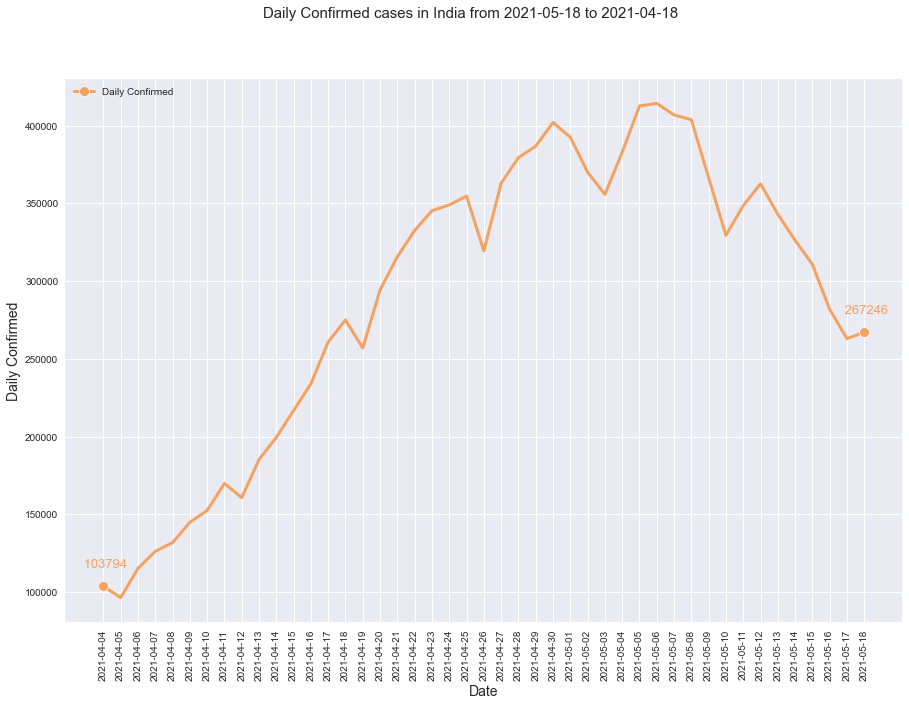

In [5]:
plt.style.use('seaborn')
plt.figure(figsize = (15, 10))


#-------------------------------------------------Plotting----------------------------------------------------------------
ax = sns.lineplot(one_month['Date'], one_month['Daily Confirmed'], color = '#f4a261',marker='o', markevery = [0, -1],
                  linestyle='-', linewidth = 3, markersize = 10, label = 'Daily Confirmed')

#-------------------------------------------------Annotating--------------------------------------------------------------
mini = one_month['Daily Confirmed'].iloc[0]
maxi = one_month['Daily Confirmed'].iloc[-1]
for x, y in zip(one_month['Date'], one_month['Daily Confirmed']):
    if (y == mini) | (y ==maxi):
        plt.text(x = x, y=y+14000, s ='{: .0f}'.format(y), ha = 'center', va = 'center', color = '#f4a261', fontsize = 13 )

#---------------------------------------------------Labelling Plot---------------------------------------------------------
plt.suptitle('Daily Confirmed cases in India from {} to {}'.format(one_month['Date'].iloc[-1], one_month['Date'].iloc[-31]),
             fontsize = 15)
plt.xlabel('Date', fontsize = 14)
plt.legend( loc = 'upper left')
plt.ylabel('Daily Confirmed', fontsize = 14)
ax.set_xticklabels(one_month['Date'], rotation = 'vertical')
plt.savefig(os.path.join('IND_'+ today.strftime('%d-%m-%Y'), 'Daily Confirmed {}.png'.format(today.strftime('%d-%m-%Y'))))
;

<b><i><H2 align="left" style='color:#8ac926'>Daily Recovered<a class='anchor' id='g'></a>

''

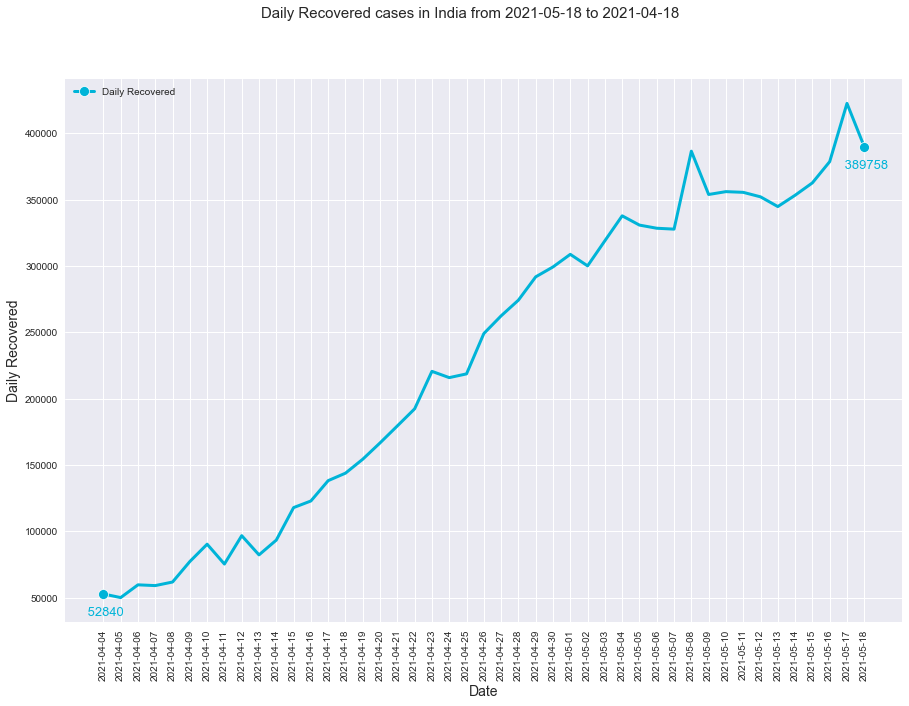

In [6]:
plt.style.use('seaborn')
plt.figure(figsize = (15, 10))


#-------------------------------------------------Plotting----------------------------------------------------------------
ax = sns.lineplot(one_month['Date'], one_month['Daily Recovered'], color = '#00b4d8',marker='o',markevery = [0, -1],
                  linestyle='-', linewidth = 3, markersize = 10, label = 'Daily Recovered')

#-------------------------------------------------Annotating--------------------------------------------------------------
mini = one_month['Daily Recovered'].iloc[0] 
maxi = one_month['Daily Recovered'].iloc[-1]
for x , y in zip(one_month['Date'], one_month['Daily Recovered']):
    if (y == mini) | (y == maxi):
        plt.text(x = x, y= y-14000, s = '{: .0f}'.format(y),ha = 'center', va = 'center', color = '#00b4d8', fontsize=13)

#---------------------------------------------------Labelling Plot---------------------------------------------------------
plt.suptitle('Daily Recovered cases in India from {} to {}'.format(one_month['Date'].iloc[-1], one_month['Date'].iloc[-31]),
             fontsize = 15)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Daily Recovered', fontsize = 14)
plt.legend( loc = 'upper left')
ax.set_xticklabels(one_month['Date'], rotation = 'vertical')
plt.savefig(os.path.join('IND_'+ today.strftime('%d-%m-%Y'), 'Daily Recovered {}.png'.format(today.strftime('%d-%m-%Y'))))
;

<b><i><H2 align="left" style='color:#8ac926'>Daily Deceased<a class='anchor' id='h'></a>

''

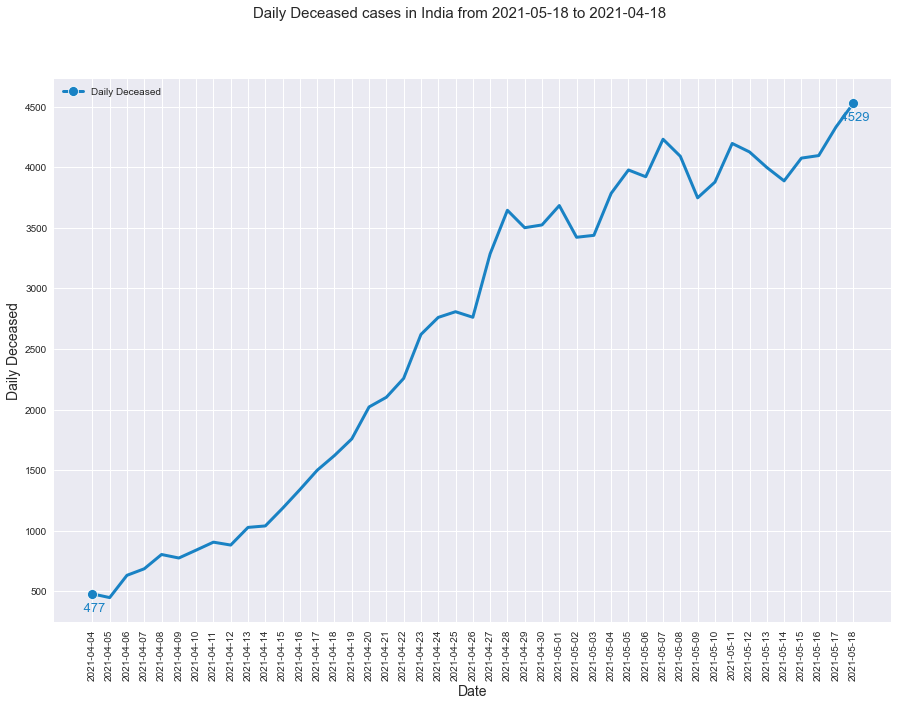

In [7]:
plt.style.use('seaborn')
plt.figure(figsize = (15, 10))


#-------------------------------------------------Plotting----------------------------------------------------------------
ax = sns.lineplot(one_month['Date'], one_month['Daily Deceased'], color = '#1982c4',marker='o',markevery = [0, -1],
                  linestyle='-', linewidth = 3, markersize = 10, label = 'Daily Deceased')

#-------------------------------------------------Annotating--------------------------------------------------------------
#label points on the plot
mini = one_month['Daily Deceased'].iloc[0] 
maxi = one_month['Daily Deceased'].iloc[-1]
for x , y in zip(one_month['Date'], one_month['Daily Deceased']):
    if (y == mini) | (y == maxi):
        plt.text(x = x, y = y-120, s = '{: .0f}'.format(y),ha = 'center', va = 'center', color = '#1982c4', fontsize=13)

#---------------------------------------------------Labelling Plot---------------------------------------------------------
plt.suptitle('Daily Deceased cases in India from {} to {}'.format(one_month['Date'].iloc[-1], one_month['Date'].iloc[-31]),
             fontsize = 15)
plt.legend( loc = 'upper left')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Daily Deceased', fontsize = 14)
ax.set_xticklabels(one_month['Date'], rotation = 'vertical')
plt.savefig(os.path.join('IND_'+ today.strftime('%d-%m-%Y'), 'Daily Deceased {}.png'.format(today.strftime('%d-%m-%Y'))))
;

<b><i><H2 align="left" style='color:#8ac926'>Daily Confirmed vs Daily Recovered<a class='anchor' id='i'></a>

''

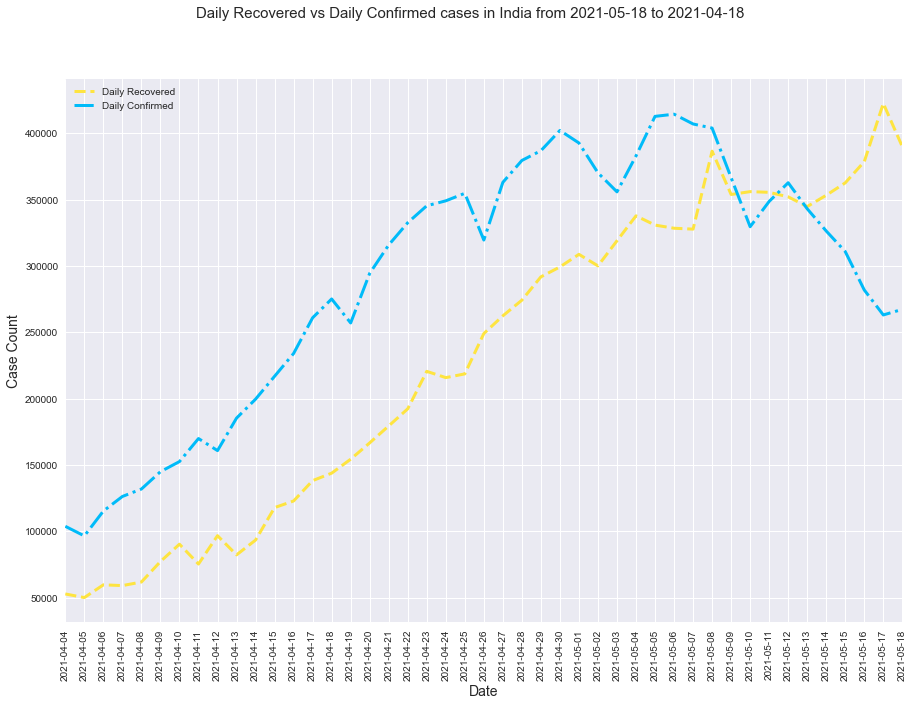

In [8]:
plt.style.use('seaborn')
plt.figure(figsize = (15, 10))


#-------------------------------------------------Plotting----------------------------------------------------------------
ax = sns.lineplot(one_month['Date'], one_month['Daily Recovered'], color = '#fee440',
                  linestyle='--', linewidth = 3, markersize = 10, label = 'Daily Recovered' )
ax = sns.lineplot(one_month['Date'], one_month['Daily Confirmed'], color = '#00bbf9',
                  linestyle='-.', linewidth = 3, markersize = 10, label = 'Daily Confirmed')

#-------------------------------------------------Annotating--------------------------------------------------------------
#for i, v in enumerate(one_month['Daily Recovered']):
#    ax.annotate(str(v), xy=(i,v), xytext=(-7,7), textcoords='offset points', color = '#240046')
    
#for i, v in enumerate(one_month['Daily Confirmed']):
#    ax.annotate(str(v), xy=(i,v), xytext=(-10,10), textcoords='offset pixels', color = '#240046')
    
#---------------------------------------------------Labelling Plot---------------------------------------------------------
plt.suptitle('Daily Recovered vs Daily Confirmed cases in India from {} to {}'.format(one_month['Date'].iloc[-1],
                                                                                      one_month['Date'].iloc[-31]),
             fontsize = 15)
ax.set_xlim(one_month['Date'].iloc[0], one_month['Date'].iloc[-1])
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Case Count', fontsize = 14)
ax.set_xticklabels(one_month['Date'], rotation = 'vertical')
plt.savefig(os.path.join('IND_'+ today.strftime('%d-%m-%Y'), 'Daily Confirmed vs Daily Recovered {}.png'.format(today.strftime('%d-%m-%Y'))))
;

<b><i><H2 align="left" style='color:#ee6055'>Total Confirmed<a class='anchor' id='j'></a>

''

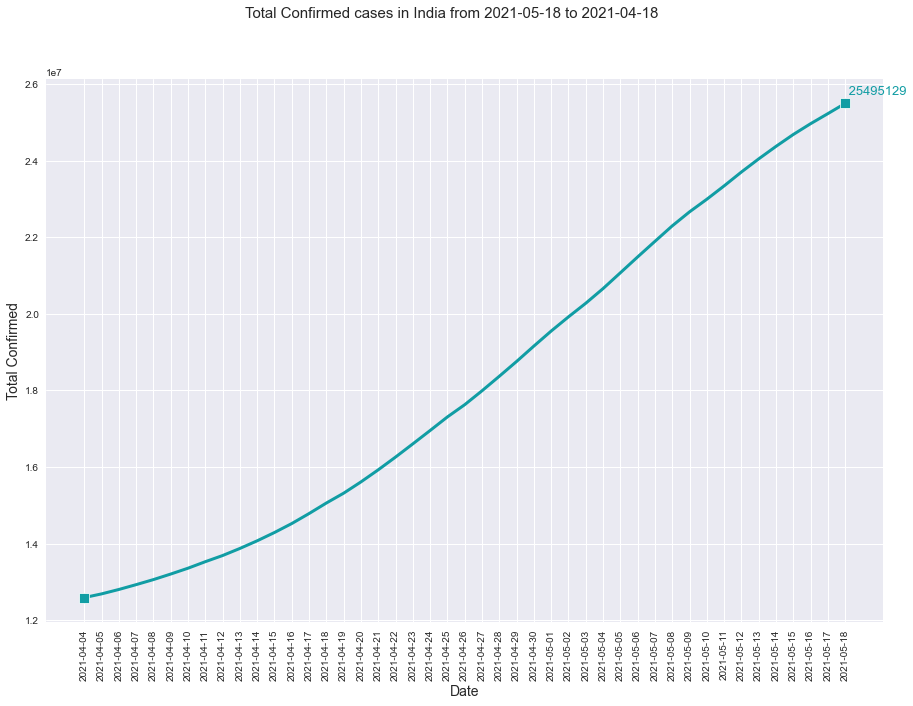

In [9]:
plt.style.use('seaborn')
plt.figure(figsize = (15, 10))


#-------------------------------------------------Plotting----------------------------------------------------------------
ax = sns.lineplot(one_month['Date'], one_month['Total Confirmed'], color = '#119da4',marker='s', markevery = [0, -1],
                  linestyle='-', linewidth = 3, markersize = 10)

#-------------------------------------------------Annotating--------------------------------------------------------------
#for value in ax.lines:
#        y = value.get_ydata()
#        if len(y)>0:
#            ax.annotate(f'{y[-1]:.0f}',xy=(1,y[-1]), xycoords=('axes fraction','data'),ha='left',va='center',color=value.get_color())
       
#mini = one_month['Total Confirmed'].iloc[0]
maxi = one_month['Total Confirmed'].iloc[-1]
for x, y in zip(one_month['Date'], one_month['Total Confirmed']):
    if (y==maxi):
        plt.text(x = x, y=y+300000, s = '{: .0f}'.format(y), ha = 'left', va = 'center', color ='#119da4', fontsize = 13 )
#---------------------------------------------------Labelling Plot---------------------------------------------------------
plt.suptitle('Total Confirmed cases in India from {} to {}'.format(one_month['Date'].iloc[-1], one_month['Date'].iloc[-31]),
             fontsize = 15)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total Confirmed', fontsize = 14)
ax.set_xticklabels(one_month['Date'], rotation = 'vertical')
#ax.set_xlim(one_month['Date'].iloc[0], one_month['Date'].iloc[-1])
plt.savefig(os.path.join('IND_'+ today.strftime('%d-%m-%Y'), 'Total Confirmed {}.png'.format(today.strftime('%d-%m-%Y'))))
;

<b><i><H2 align="left" style='color:#ee6055'>Total Recovered<a class='anchor' id='k'></a>

''

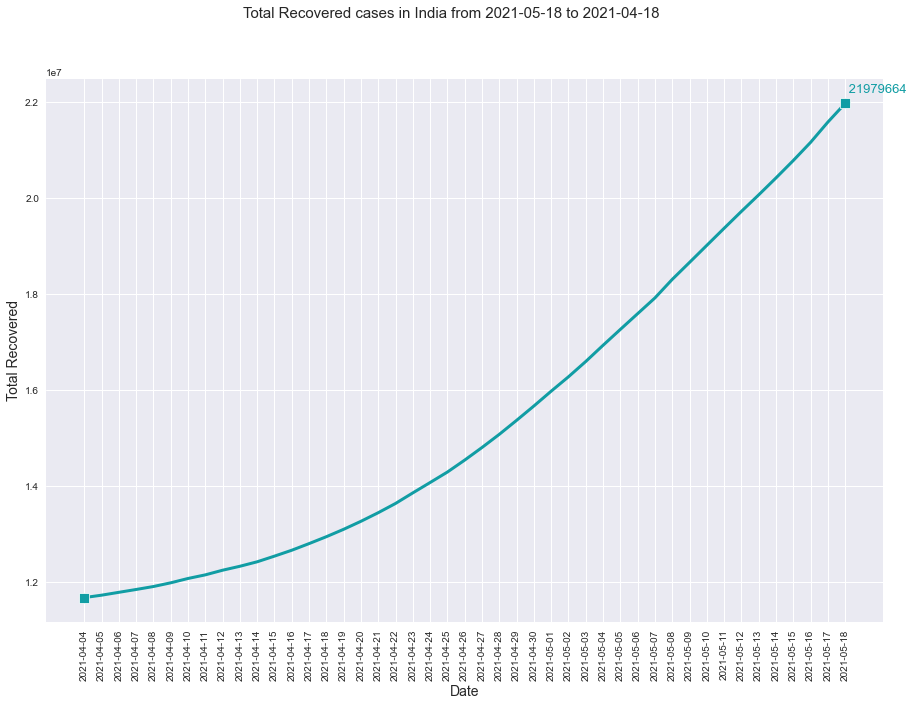

In [10]:
plt.style.use('seaborn')
plt.figure(figsize = (15, 10))


#-------------------------------------------------Plotting----------------------------------------------------------------
ax = sns.lineplot(one_month['Date'], one_month['Total Recovered'], color = '#119da4',marker='s',markevery = [0, -1],
                  linestyle='-', linewidth = 3, markersize = 10)

#-------------------------------------------------Annotating--------------------------------------------------------------
#mini = one_month['Total Recovered'].iloc[0]
maxi = one_month['Total Recovered'].iloc[-1]
for x, y in zip(one_month['Date'], one_month['Total Recovered']):
    if (y==maxi):
        plt.text(x = x, y=y+300000, s = '{: .0f}'.format(y), ha = 'left', va = 'center', color ='#119da4', fontsize = 13 )   

#---------------------------------------------------Labelling Plot---------------------------------------------------------
plt.suptitle('Total Recovered cases in India from {} to {}'.format(one_month['Date'].iloc[-1], one_month['Date'].iloc[-31]),
             fontsize = 15)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total Recovered', fontsize = 14)
ax.set_xticklabels(one_month['Date'], rotation = 'vertical')
#ax.set_xlim(one_month['Date'].iloc[0], one_month['Date'].iloc[-1])
plt.savefig(os.path.join('IND_'+ today.strftime('%d-%m-%Y'), 'Total Recovered {}.png'.format(today.strftime('%d-%m-%Y'))))
;

<b><i><H2 align="left" style='color:#ee6055'>Total Deceased<a class='anchor' id='l'></a>

''

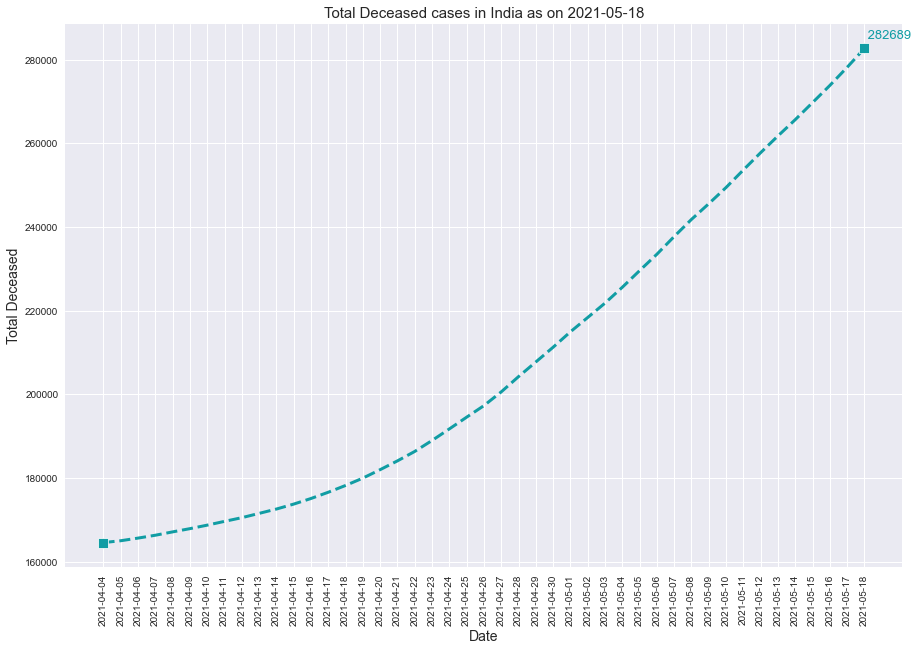

In [11]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (15, 10))


#-------------------------------------------------Plotting----------------------------------------------------------------
ax = sns.lineplot(one_month['Date'], one_month['Total Deceased'], color = '#119da4',marker='s', markevery = [0, -1],
                  linestyle='--', linewidth = 3, markersize = 10)

#-------------------------------------------------Annotating--------------------------------------------------------------
#mini = one_month['Total Deceased'].iloc[0]
maxi = one_month['Total Deceased'].iloc[-1]
for x, y in zip(one_month['Date'], one_month['Total Deceased']):
    if (y==maxi):
        plt.text(x = x, y=y+3000, s = '{: .0f}'.format(y), ha = 'left', va = 'center', color ='#119da4', fontsize = 13 )   
   

#---------------------------------------------------Labelling Plot---------------------------------------------------------
plt.title('Total Deceased cases in India as on {}'.format(one_month['Date'].iloc[-1]),
             fontsize = 15)

plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total Deceased', fontsize = 14)
ax.set_xticklabels(one_month['Date'], rotation = 'vertical')
#ax.set_xlim(one_month['Date'].iloc[0], one_month['Date'].iloc[-1])
plt.savefig(os.path.join('IND_'+ today.strftime('%d-%m-%Y'), 'Total Deceased {}.png'.format(today.strftime('%d-%m-%Y'))))
;

<b><i><H2 align="left" style='color:#ee6055'>Total Deceased vs Total Recovered vs Total Deceased<a class='anchor' id='m'></a>

''

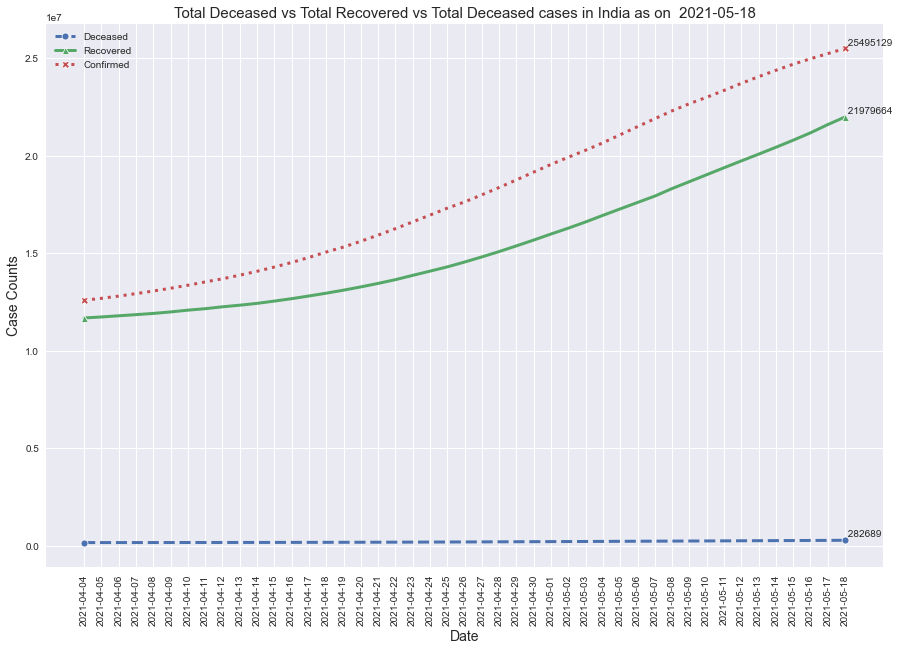

In [12]:
plt.style.use('seaborn')
plt.figure(figsize = (15, 10))


#-------------------------------------------------Plotting----------------------------------------------------------------
ax = sns.lineplot(one_month['Date'], one_month['Total Deceased'],  linestyle='--',linewidth = 3, label = 'Deceased', marker = 'o', markevery = [0, -1])
ax = sns.lineplot(one_month['Date'], one_month['Total Recovered'], linestyle='-', linewidth = 3, label = 'Recovered',marker = '^', markevery = [0, -1])
ax = sns.lineplot(one_month['Date'], one_month['Total Confirmed'], linestyle=':', linewidth = 3, label = 'Confirmed',marker = 'X', markevery = [0, -1])

#-------------------------------------------------Annotating--------------------------------------------------------------
#mini = one_month['Total Deceased'].iloc[0]
maxi = one_month['Total Deceased'].iloc[-1]
for x, y in zip(one_month['Date'], one_month['Total Deceased']):
    if (y==maxi):
        plt.text(x = x, y=y+300000, s = '{: .0f}'.format(y), ha = 'left', va = 'center', fontsize = 10 )   
#mini = one_month['Total Recovered'].iloc[0]
maxi = one_month['Total Recovered'].iloc[-1]
for x, y in zip(one_month['Date'], one_month['Total Recovered']):
    if (y==maxi):
        plt.text(x = x, y=y+300000, s = '{: .0f}'.format(y), ha = 'left', va = 'center', fontsize = 10 )   
#mini = one_month['Total Confirmed'].iloc[0]
maxi = one_month['Total Confirmed'].iloc[-1]
for x, y in zip(one_month['Date'], one_month['Total Confirmed']):
    if (y==maxi):
        plt.text(x = x, y=y+300000, s = '{: .0f}'.format(y), ha = 'left', va = 'center',  fontsize = 10 )   


#---------------------------------------------------Labelling Plot---------------------------------------------------------
plt.title('Total Deceased vs Total Recovered vs Total Deceased cases in India as on  {}'.format(one_month['Date'].iloc[-1]),
             fontsize = 15)
#ax.set_xlim(one_month['Date'].iloc[0], one_month['Date'].iloc[-1])
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Case Counts', fontsize = 14)
ax.set_xticklabels(one_month['Date'], rotation = 'vertical')
plt.savefig(os.path.join('IND_'+ today.strftime('%d-%m-%Y'), 'Total Deceased vs Total Recovered vs Total Confirmed {}.png'.format(today.strftime('%d-%m-%Y'))))
;

<b><i><H2 align="left" style='color:#ee6055'>Overall Timeline<a class='anchor' id='p'></a>

In [13]:
#india['Date'] = pd.to_datetime(india['Date'], format = ('%Y-%m-%d'))

''

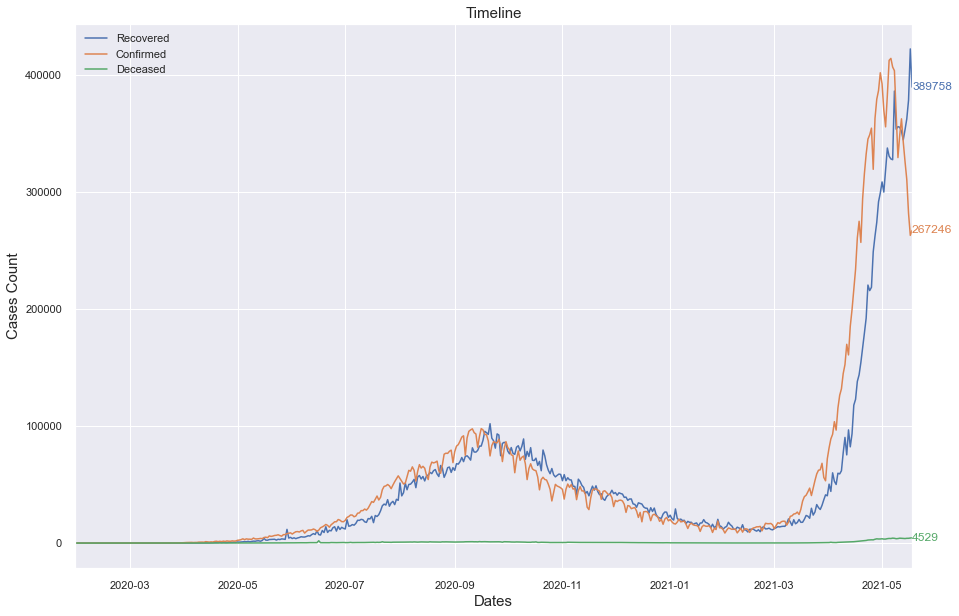

In [14]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15, 10), constrained_layout=False)

india['Date'] = pd.to_datetime(india['Date'], format = ('%Y-%m-%d'))

ax = sns.lineplot( india['Date'], india['Daily Recovered'], label = 'Recovered')
ax = sns.lineplot( india['Date'], india['Daily Confirmed'], label = 'Confirmed')
ax = sns.lineplot( india['Date'], india['Daily Deceased'], label = 'Deceased')

for value in ax.lines:
        y = value.get_ydata()
        if len(y)>0:
            ax.annotate(f'{y[-1]:.0f}',xy=(1,y[-1]), xycoords=('axes fraction','data'),ha='left',va='center',color=value.get_color())
       

#mini = one_month['Total Recovered'].iloc[0]
#maxi = one_month['Total Recovered'].iloc[-1]
#for x, y in zip(one_month['Date'], one_month['Total Recovered']):
#    if (y==maxi):
#        plt.text(x = x, y=y+120, s = '{: .0f}'.format(y), ha = 'left', va = 'center', color ='#119da4', fontsize = 13 )   


ax.set_xlim(india['Date'].iloc[0], india['Date'].iloc[-1])    


plt.title('Timeline', fontsize = 15)
plt.xlabel('Dates', fontsize = 15)
plt.ylabel('Cases Count', fontsize = 15)
plt.savefig(os.path.join('IND_'+ today.strftime('%d-%m-%Y'), 'Overall Timeline {}.png'.format(today.strftime('%d-%m-%Y'))))
;

<h1><center style='color:#4ecdc4'>Stats<a class='anchor' id='n'></a>

In [15]:
#--------------------------------------------------Printing new Confirmed Cases--------------------------------------------
print('New confirmed cases on {} are {}'.format(one_month['Date'].iloc[-1], one_month['Daily Confirmed'].iloc[-1] ))

New confirmed cases on 2021-05-18 are 267246


In [16]:
#--------------------------------------------------Printing new Recovered Cases--------------------------------------------
print('New Daily Recovered cases on {} are {}'.format(one_month['Date'].iloc[-1], one_month['Daily Recovered'].iloc[-1] ))

New Daily Recovered cases on 2021-05-18 are 389758


In [17]:
#--------------------------------------------------Printing new Deceased Cases--------------------------------------------
print('New Deceased cases on {} are {}'.format(one_month['Date'].iloc[-1], one_month['Daily Deceased'].iloc[-1] ))

New Deceased cases on 2021-05-18 are 4529


In [18]:
#--------------------------------------------------Printing Total Confirmed Cases--------------------------------------------
print('Total Confirmed cases as on {} are {}'.format(one_month['Date'].iloc[-1], one_month['Total Confirmed'].iloc[-1] ))

Total Confirmed cases as on 2021-05-18 are 25495129


In [19]:
#--------------------------------------------------Printing Total Recovered Cases--------------------------------------------
print('Total Recovered cases as on {} are {}'.format(one_month['Date'].iloc[-1], one_month['Total Recovered'].iloc[-1] ))

Total Recovered cases as on 2021-05-18 are 21979664


In [20]:
#--------------------------------------------------Printing Total Deceased Cases--------------------------------------------
print('Total Deceased cases as on {} are {}'.format(one_month['Date'].iloc[-1], one_month['Total Deceased'].iloc[-1] ))

Total Deceased cases as on 2021-05-18 are 282689


[TOP](#o)